# IMPORT AND READ DATASET

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bank_churn = pd.read_csv('../data/train.csv')
bank_churn.drop(columns=['id', 'CustomerId', 'Surname'], inplace=True)
bank_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


# CLEAN DATASET

In [2]:
bank_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


In [3]:
numeric_features = list(bank_churn.select_dtypes(include=['int', 'float']).columns)
categorical_features = list(bank_churn.select_dtypes(include=['object']).columns)

discrete_features = ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
continuous_features = list(set(numeric_features)-set(discrete_features)-{'Exited'})

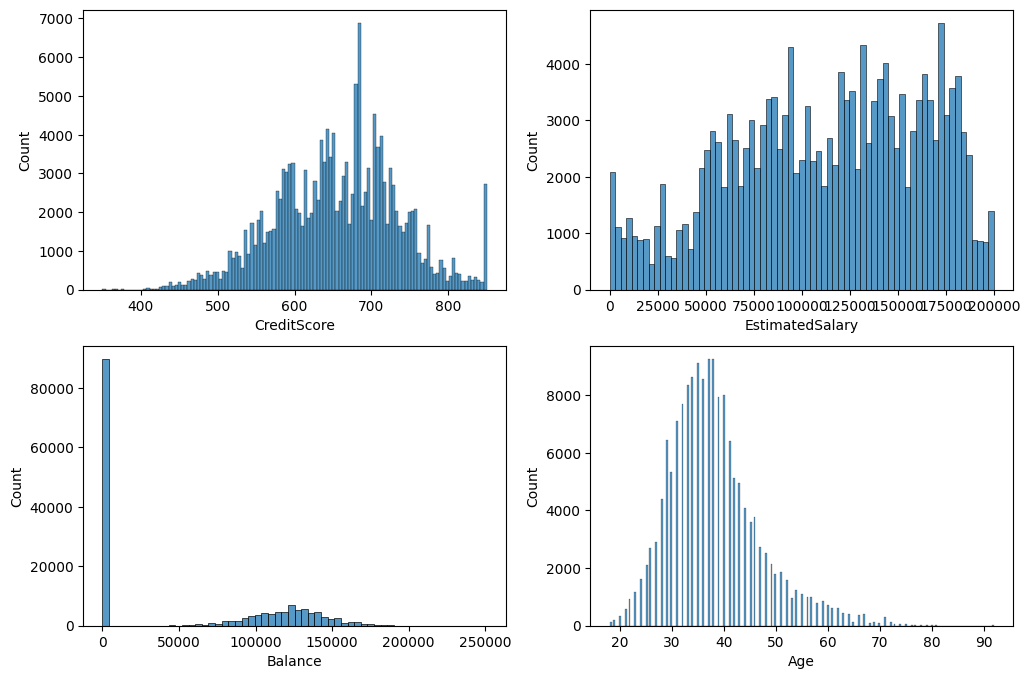

In [4]:
plt.figure(figsize=(12, 8))
idx = 1
for feature in continuous_features:
    plt.subplot(2, 2, idx)
    sns.histplot(bank_churn[feature])
    idx+= 1

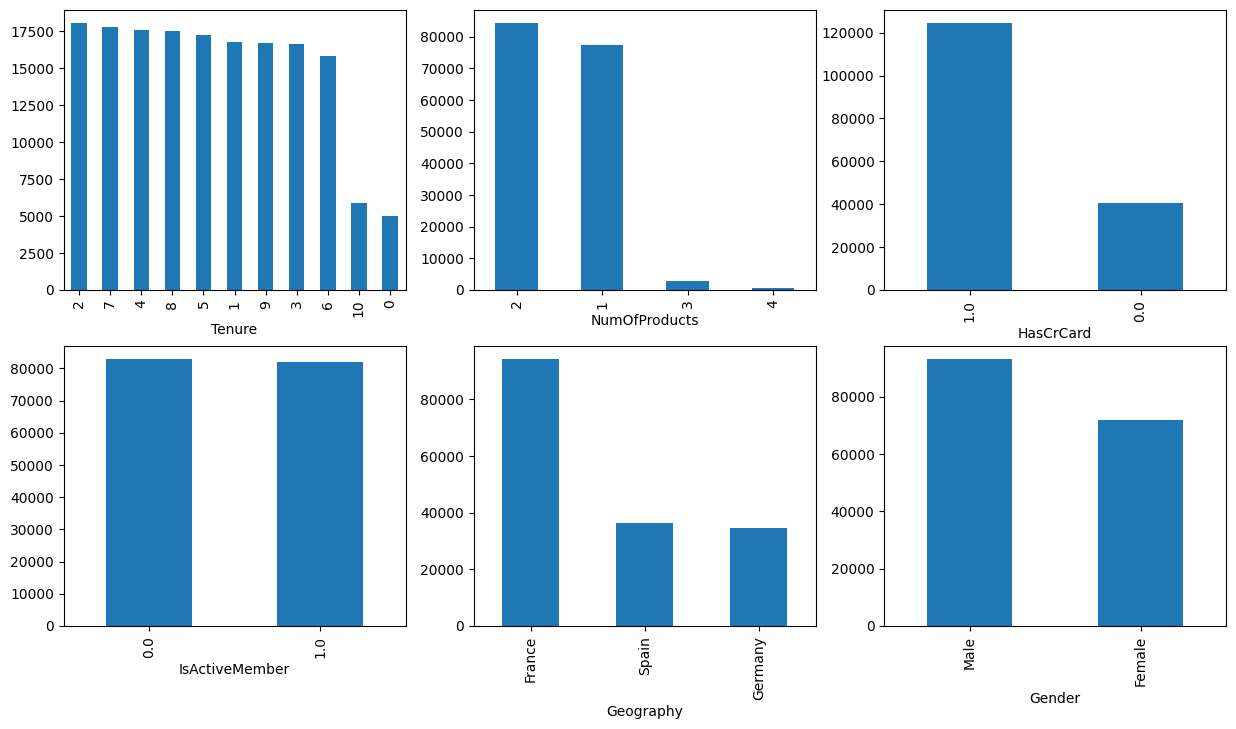

In [5]:
plt.figure(figsize=(15, 8))
idx = 1
for feature in (discrete_features + categorical_features):
    plt.subplot(2, 3, idx)
    bank_churn[feature].value_counts().plot.bar()
    idx+= 1

# BUILD MODEL

In [6]:
features = [
    'CreditScore',
    'Geography',
    'Gender',
    'Age',
    'Tenure',
    'Balance',
    'NumOfProducts',
    'HasCrCard',
    'IsActiveMember',
    'EstimatedSalary'
]

X = bank_churn[features]
y = bank_churn['Exited']

numeric_features = list(X.select_dtypes(include=['int', 'float']).columns)
discrete_features = ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
continuous_features = list(set(numeric_features)-set(discrete_features))
categorical_features = list(X.select_dtypes(include=['object']).columns)

In [7]:
print(X.shape)

(165034, 10)


In [12]:
X.shape == (X.shape[0], )

False

In [8]:
print(X.ndim)

2


In [14]:
print(X.shape[1])

10


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='error'))
])

data_prep = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, continuous_features),
        ('categorical', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('prep', data_prep),
    ('lr', LogisticRegression(C=.422, penalty="l1", solver="saga"))
])

In [8]:
pipeline

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Balance',
                                                   'Age', 'EstimatedSalary']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Geography', 'Gender'])])),
                ('lr',
                 LogisticRegression(C=0.422, penalty='l1', solver='saga'))])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

X_train= data_prep.fit_transform(X_train)

In [10]:
print(type(y_train))

<class 'pandas.core.series.Series'>
